## **Baseline Model For 11785 Project**

 Group members: Jerry Yin, Anqi Xie, Jiayu Wang, Haoyu Yang

This LSTM-based deep learning model predicts the closing price of the SSE Composite Index using 10 years of historical stock market data from Yahoo Finance. The dataset includes Open, High, Low, and Close prices, which are normalized using MinMaxScaler. A stacked LSTM architecture with two hidden layers (128 units each) is trained using the Adam optimizer and Mean Squared Error (MSE) loss function. The model learns from the past 60 days to predict a future close price and is evaluated on an unseen test dataset. This baseline provides a strong foundation for stock price forecasting and can be further optimized.

# Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math

# Config

In [5]:
window_size = 60
n_hidden_layers = 2
units = 128
activation = 'relu'
optimizer = 'adam'
loss = 'mse'
epochs = 50
batch_size = 32

# Load Data
The dataset used here is from Yahoo Finance. The past 10 years of data is downloaded, and 90% is used as training data, with the rest 10% used as testing data. Data is normalized to the range of [0,1].

In [12]:
#load data fromYahoo Finance
end_date = datetime.today()
start_date = end_date - timedelta(days=10*365)
name = "000001.SS"
df = yf.download(name, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
df = df[['Open', 'High', 'Low', 'Close']].dropna()  #ensure no missing values

data_values = df.values  #(num_days, 4)
num_features = data_values.shape[1]  #4

#split 90% as train data and the rest 10% for testing
train_size = int(len(data_values) * 0.90)
train_data = data_values[:train_size]
test_data  = data_values[train_size:]

#normalize
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

[*********************100%***********************]  1 of 1 completed


# Model and Training

In [7]:
#Seqs for training and testing
X_train, y_train = [], []
X_test, y_test = [], []

#training seqs and targets (sequence from (i-window_size) to (i-1) as input, and i-th day close as target)
for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i])
    y_train.append(train_scaled[i, -1])#get close price

#create test sequences within the test_scaled array separately
for i in range(window_size, len(test_scaled)):
    X_test.append(test_scaled[i-window_size:i])
    y_test.append(test_scaled[i, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test   = np.array(X_test),  np.array(y_test)

print("Training sequences shape:", X_train.shape)
print("Testing sequences shape:", X_test.shape)

# Model
model = Sequential()
model.add(LSTM(units, activation=activation, return_sequences=True, input_shape=(window_size, num_features)))
model.add(LSTM(units, activation=activation, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer=optimizer, loss=loss)

#train
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test), shuffle=False)


Training sequences shape: (2123, 60, 4)
Testing sequences shape: (183, 60, 4)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0390 - val_loss: 0.0018
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599,429 (2.29 MB)

 Trainable params: 199,809 (780.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 399,620 (1.52 MB)

# Testing

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step
Test RMSE: 52.014


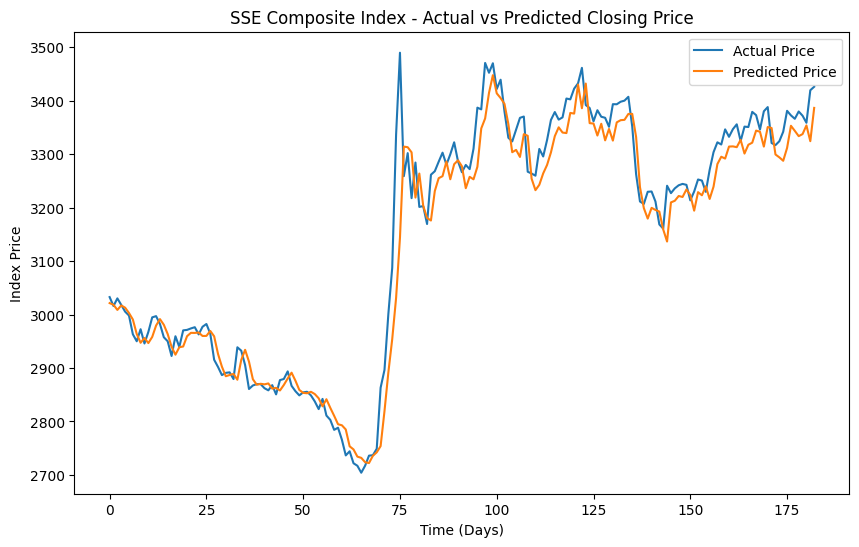

In [9]:
#Test dataset
y_pred_scaled = model.predict(X_test)
close_index = list(df.columns.get_level_values(0)).index('Close')#close column index
close_min = scaler.data_min_[close_index]
close_max = scaler.data_max_[close_index]

# convert y_test and y_pred to original price (now normalized)
y_test_scaled = y_test.reshape(-1)
y_pred_actual = y_pred_scaled * (close_max - close_min) + close_min
y_test_actual = y_test_scaled * (close_max - close_min) + close_min

#test set rmse
rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Test RMSE: {rmse:.3f}")

#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred_actual, label='Predicted Price')
plt.title('SSE Composite Index - Actual vs Predicted Closing Price')
plt.xlabel('Time (Days)')
plt.ylabel('Index Price')
plt.legend()
plt.show()